<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 650.2 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 2.2 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 4.1 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 4.9 MB/s eta 0:00:01
     ------------------ --------------------- 1.3/3.0 MB 5.3 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 5.9 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 6.1 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/3.0 MB 6.1 MB/s eta 0:00:01
     -------------------------------- ------- 2.4/3.0 MB 5.9 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 5.9 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.6 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.6 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.6 MB 5.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.6 MB 5.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 6.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.6 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.8/11.6 MB 6.4 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.6 MB 6.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.3/11.6 MB 6.5 MB/s eta 0:00:02
   ----------


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\Sharath\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
data = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
tesla_data=data.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla_data_reset = tesla_data.reset_index()
tesla_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [11]:
data=requests.get(url).text
soup=BeautifulSoup(data,"html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [13]:
tables = pd.read_html(url)

# Inspecting all the tables to find the correct one
for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.head(), "\n")  # Print first few rows of each table for inspection

# Assume the correct table is identified (for this example, let's assume it's the 1st one)
tesla_revenue = tables[1]  
# Checking the columns to find the relevant ones
print(tesla_revenue.columns)
# For this example, assuming the columns we need are in positions 0 and 1
# Adjust based on the actual table structure after inspection
tesla_revenue = tesla_revenue.iloc[:, [0, 1]]
# Renaming columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
# Cleaning the 'Revenue' column: Remove any commas and dollar signs, convert to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

Table 0:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759   

Table 1:
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2022-09-30   
1                                 2022-06-30   
2                                 2022-03-31   
3                                 2021-12-31   
4                                 2021-09-30   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $21,454  
1                                      $

In [15]:
tesla_revenue.dropna(inplace=True)

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [17]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
data1=yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
gme_data=data1.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
gme_data_reset=gme_data.reset_index()
gme_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [21]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [22]:
data2=requests.get(url).text
soup=BeautifulSoup(data2,"html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
tables = pd.read_html(url)
for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.head(), "\n")  
gme_revenue = tables[1]  

# Checking the columns to find the relevant ones
print(gme_revenue.columns)

# For this example, assuming the columns we need are in positions 0 and 1
# Adjust based on the actual table structure after inspection
gme_revenue = gme_revenue.iloc[:, [0, 1]]

# Renaming columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Cleaning the 'Revenue' column: Remove any commas and dollar signs, convert to float
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

Table 0:
   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364   

Table 1:
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2020-04-30   
1                                    2020-01-31   
2                                    2019-10-31   
3                                    2019-07-31   
4                                    2019-04-30   

  GameStop Quarterly Revenue (Millions of US $).1  
0                               

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


[*********************100%%**********************]  1 of 1 completed


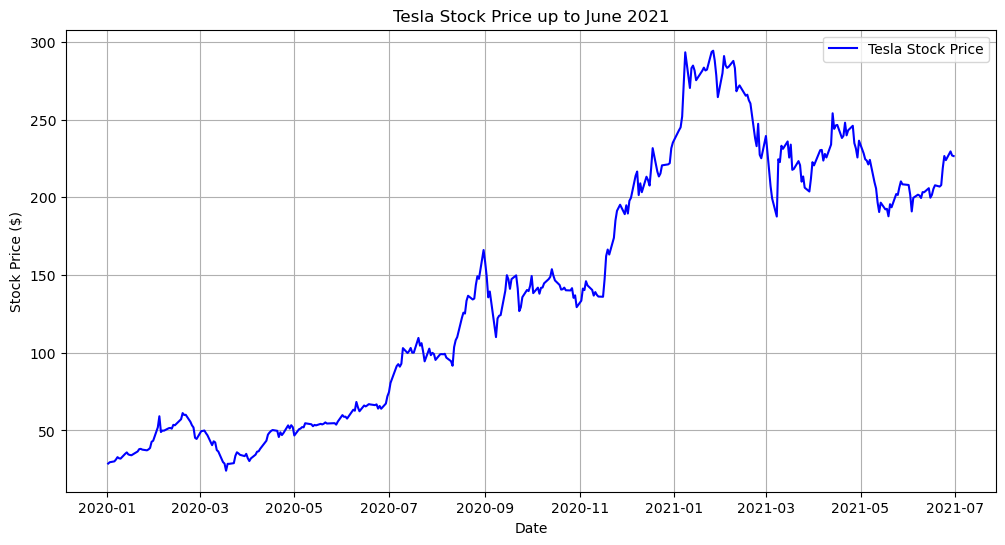

In [31]:
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extracting Tesla stock data from yfinance
tesla_data = yf.download("TSLA", start="2020-01-01", end="2021-07-01")

# Resetting the index to make 'Date' a column
tesla_data_reset = tesla_data.reset_index()

# Filter data to include only up to June 2021
tesla_data_filtered = tesla_data_reset[tesla_data_reset['Date'] <= '2021-06-30']

# Plot the data
make_graph(tesla_data_filtered, 'Tesla Stock Price up to June 2021')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


[*********************100%%**********************]  1 of 1 completed


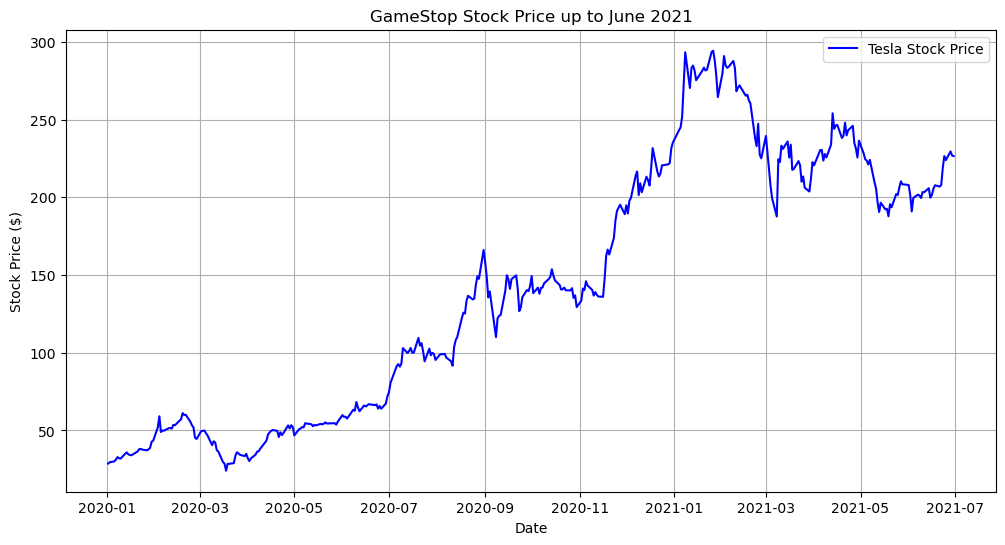

In [32]:
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extracting Tesla stock data from yfinance
gme_data = yf.download("GME", start="2020-01-01", end="2021-07-01")

# Resetting the index to make 'Date' a column
gme_data_reset = tesla_data.reset_index()

# Filter data to include only up to June 2021
gme_data_filtered = gme_data_reset[gme_data_reset['Date'] <= '2021-06-30']

# Plot the data
make_graph(gme_data_filtered, 'GameStop Stock Price up to June 2021')